# Credit Card Fraud - Report Summary

In this mini-project, I am curious to learn how unsupervised learning methods compares with supervised learning methods, when it comes to detecting credit card fraud. I will build the exercise using both supervised methods and unsupervised methods, and then compare their f1 scores. For supervised methods, I will train one linear model (logistic regression), and another tree-based model (random forest). For unsupervised methods, I plan to first separate the dataset into 2 clusters using two methods: K-means that we've learned in class, and also a tree-based method (Isolated Forest). I then map the clusters to the ground truth in the training and test sets to measure the f1 score, and compare with the scores obtained from supervised methods.

Overall, for this particular dataset, I find that tree-based supervised learning method (random forest) is superior to unsupervised learning method (including tree based unsupervised learning method such as Isolation Forest).

In [125]:
# !pip install arcgis

In [126]:
import pandas as pd
import numpy as np
from numpy import unique
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import itertools
from mpl_toolkits.mplot3d import Axes3D

# Data Source

The data source of this project is the Credit Card Transaction Fraud Detection Dataset from Kaggle. The source of the dataset can be found using the links below.

https://www.kaggle.com/datasets/kartik2112/fraud-detection/data

In [127]:
# from google.colab import files
# uploaded = files.upload()

In [128]:
!ls

fraudTest.csv  fraudTrain.csv  sample_data


In [129]:
df_train = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv('fraudTest.csv')

In [130]:
df_train.shape

(1296675, 23)

In [131]:
df_test.shape

(555719, 23)

In [132]:
# data too large! take 10% random sample

k = 0.1
df_train = df_train.sample(frac=k, random_state=42)
df_train.shape


(129668, 23)

In [133]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [134]:
df_train.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
1045211     1045211   2020-03-09 15:09:26      577588686219   
547406       547406   2019-08-22 15:49:01    30376238035123   
110142       110142   2019-03-04 01:34:16  4658490815480264   
1285953     1285953   2020-06-16 20:04:38  3514897282719543   
271705       271705   2019-05-14 05:54:48  6011381817520024   

                                            merchant        category     amt  \
1045211                              fraud_Towne LLC        misc_pos  194.51   
547406                             fraud_Friesen Ltd  health_fitness   52.32   
110142                                fraud_Mohr Inc    shopping_pos    6.53   
1285953                      fraud_Gaylord-Powlowski            home    7.33   
271705   fraud_Christiansen, Goyette and Schamberger   gas_transport   64.29   

           first        last gender                        street  ...  \
1045211    James  Strickland      M            25454 Leonard Lake  ...   
547406   Cynthia       Davis      F            7177 Steven Forges  ...   
110142      Tara    Richards      F         4879 Cristina Station  ...   
1285953   Steven    Faulkner      M  841 Cheryl Centers Suite 115  ...   
271705   Kristen       Allen      F     8619 Lisa Manors Apt. 871  ...   

             lat      long  city_pop                                    job  \
1045211  40.6153  -79.4545       972     Public relations account executive   
547406   42.8250 -124.4409       217                    Retail merchandiser   
110142   39.9636  -79.7853       184                      Systems developer   
1285953  42.9580  -77.3083     10717                         Cytogeneticist   
271705   41.6423 -104.1974       635  Product/process development scientist   

                dob                         trans_num   unix_time  merch_lat  \
1045211  1997-10-23  fff87d4340ef756a592eac652493cf6b  1362841766  40.420453   
547406   1928-10-01  d0ad335af432f35578eea01d639b3621  1345650541  42.758860   
110142   1945-11-04  87f26e3ea33f4ff4c7a8bad2c7f48686  1330824856  40.475159   
1285953  1952-10-13  9c34015321c0fa2ae6fd20f9359d1d3e  1371413078  43.767506   
271705   1973-07-13  198437c05676f485e9be04449c664475  1336974888  41.040392   

         merch_long  is_fraud  
1045211  -78.865012         0  
547406  -123.636337         0  
110142   -78.898190         0  
1285953  -76.542384         0  
271705  -104.092324         0  

[5 rows x 23 columns]

In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129668 entries, 1045211 to 879092
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129668 non-null  int64  
 1   trans_date_trans_time  129668 non-null  object 
 2   cc_num                 129668 non-null  int64  
 3   merchant               129668 non-null  object 
 4   category               129668 non-null  object 
 5   amt                    129668 non-null  float64
 6   first                  129668 non-null  object 
 7   last                   129668 non-null  object 
 8   gender                 129668 non-null  object 
 9   street                 129668 non-null  object 
 10  city                   129668 non-null  object 
 11  state                  129668 non-null  object 
 12  zip                    129668 non-null  int64  
 13  lat                    129668 non-null  float64
 14  long                   129668 non-n

In [136]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [137]:
toDrop = ['trans_date_trans_time', 'unix_time', 'first', 'last', 'street', 'trans_num', 'merchant', 'city', 'state', 'zip', 'job', 'dob', 'Unnamed: 0', 'cc_num']
df_train = df_train.drop(columns= toDrop)  # remove sparse categorical variables
df_test = df_test.drop(columns= toDrop) # remove sparse categorical variables

# Data Pre-processing
1. Drop sparse categorical variables (ZIP, first name, last name, street)
2. One Hot Encode categorical variables (gender, purchase category)
3. Create purhcase distance from home metric


In [138]:
def onehotencode(df_train, variableName):
  dummies = pd.get_dummies(df_train[variableName])
  df = pd.concat([df_train, dummies], axis=1)
  df = df.drop(columns=[variableName])
  return df

In [139]:
# one hot encode gender
df_train = onehotencode(df_train, 'gender')
df_test = onehotencode(df_test, 'gender')

In [140]:
# one hot encode purchase category
df_train = onehotencode(df_train, 'category')
df_test = onehotencode(df_test, 'category')

In [141]:
df_train.columns

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud',
       'F', 'M', 'entertainment', 'food_dining', 'gas_transport',
       'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets',
       'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel'],
      dtype='object')

In [142]:
# calculate distance from purchase

def merch_distance(df):
  df['latdiff'] = abs(df['lat'] - df['merch_lat']) ** 2
  df['longdiff'] = abs(df['long'] - df['merch_long']) ** 2
  df['merch_distance'] = (df['latdiff'] + df['longdiff']) ** (1/2)
  return df.drop(columns = ['latdiff', 'longdiff', 'lat','long'])

df_train = merch_distance(df_train)
df_test = merch_distance(df_test)


# EDA

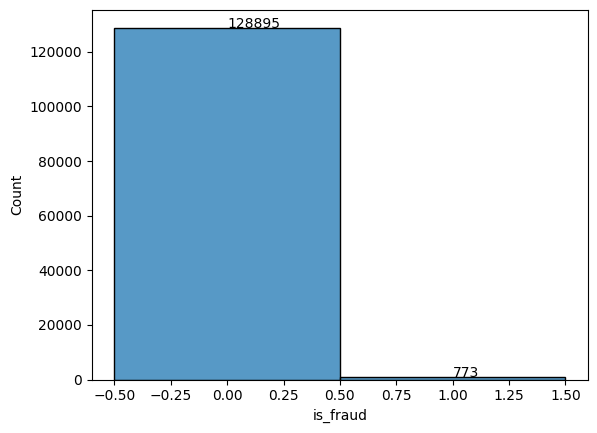

In [143]:
# Dependent Variable: Is Fraud

ax = sns.histplot(df_train['is_fraud'], discrete=True, kde=False)
for patch in ax.patches:
    count = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, count, int(count))


<Axes: >

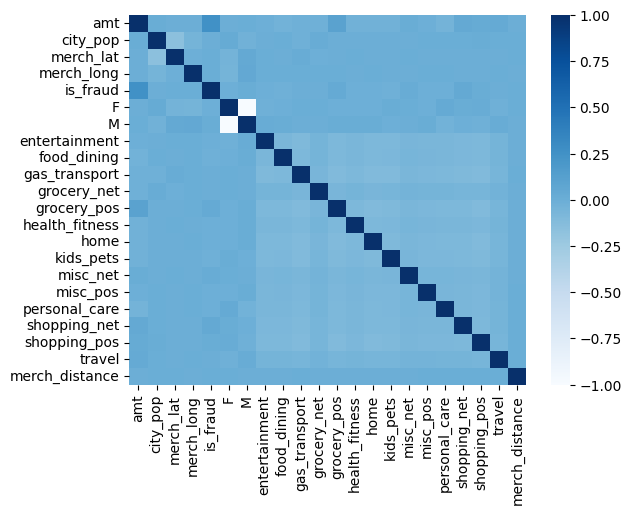

In [144]:
# correlation map
corr = df_train.corr()
sns.heatmap(corr, cmap='Blues')

In [145]:
df_train.head()

amt  city_pop  merch_lat  merch_long  is_fraud      F      M  \
1045211  194.51       972  40.420453  -78.865012         0  False   True   
547406    52.32       217  42.758860 -123.636337         0   True  False   
110142     6.53       184  40.475159  -78.898190         0   True  False   
1285953    7.33     10717  43.767506  -76.542384         0  False   True   
271705    64.29       635  41.040392 -104.092324         0   True  False   

         entertainment  food_dining  gas_transport  ...  health_fitness  \
1045211          False        False          False  ...           False   
547406           False        False          False  ...            True   
110142           False        False          False  ...           False   
1285953          False        False          False  ...           False   
271705           False        False           True  ...           False   

          home  kids_pets  misc_net  misc_pos  personal_care  shopping_net  \
1045211  False      False     False      True          False         False   
547406   False      False     False     False          False         False   
110142   False      False     False     False          False         False   
1285953   True      False     False     False          False         False   
271705   False      False     False     False          False         False   

         shopping_pos  travel  merch_distance  
1045211         False   False        0.620855  
547406          False   False        0.807277  
110142           True   False        1.024039  
1285953         False   False        1.114418  
271705          False   False        0.611011  

[5 rows x 22 columns]

# Model Building: Supervised Learning Model

In [146]:
# standardize all columns

scaler = StandardScaler()
cols = df_train.drop(columns=['is_fraud']).columns
df_train[cols] = scaler.fit_transform(df_train[cols])
df_test[cols] = scaler.transform(df_test[cols])

In [147]:
# CV model training

class ModelTraining:

  def __init__(self, model, df_train, df_test):
    self.model = model
    self.trainX = df_train.drop(columns=['is_fraud'])
    self.trainY = df_train['is_fraud']
    self.testX = df_test.drop(columns=['is_fraud'])
    self.testY = df_test['is_fraud']
    self.inSampleScores = None
    self.outSampleScores = None
    self.predY = None

  def captureScores(self, testY, predY):
    scoresDict = {
        'accuracy': accuracy_score(testY, predY),
        'precision': precision_score(testY, predY),
        'recall': recall_score(testY, predY),
        'f1': f1_score(testY, predY)
    }

    return scoresDict

  def runCrossVal(self, n):
    kFoldCV = KFold(n_splits=n, shuffle=True)

    # In-sample predictions
    self.model.fit(self.trainX, self.trainY)
    trainPredY = self.model.predict(self.trainX)
    self.inSampleScores = self.captureScores(self.trainY, trainPredY)

    # Out-sample predictions
    self.predY = cross_val_predict(self.model, self.testX, self.testY, cv=kFoldCV)
    self.outSampleScores = self.captureScores(self.testY, self.predY)

  def confMatrix(self, labels=None, title="Confusion Matrix"):
    labels = sorted(unique(list(self.testY) + list(self.predY)))
    cm = confusion_matrix(self.testY, self.predY, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

  def printScores(self, modelName):
    print(f"{modelName}: ")
    print(f"=====================================================\n")
    print(f"In-sample Training Scores (KFold CV):")
    print(f"Accuracy: {self.inSampleScores['accuracy']}")
    print(f"f1: {self.inSampleScores['f1']}")
    print(f"precision: {self.inSampleScores['precision']}")
    print(f"recall: {self.inSampleScores['recall']}")
    print(f"Out-sample Testing Scores (KFold CV):")
    print(f"Accuracy: {self.outSampleScores['accuracy']}")
    print(f"f1: {self.outSampleScores['f1']}")
    print(f"precision: {self.outSampleScores['precision']}")
    print(f"recall: {self.outSampleScores['recall']}")




In [148]:
# Training supervised models - Logistic Regression, Random Forest
modelLogistic = LogisticRegression()
trainerLogistic = ModelTraining(modelLogistic, df_train, df_test)

modelRF = RandomForestClassifier()
trainerRF = ModelTraining(modelRF, df_train, df_test)


In [149]:
# train on data

trainerLogistic.runCrossVal(3)

In [150]:
trainerRF.runCrossVal(3)

Tree based method like Random forest has much better out-of-sample prediction statistics than logistic regression

In [151]:
# print scores
trainerLogistic.printScores("Logistic Reg")
trainerRF.printScores("Random Forest")

Logistic Reg: 

In-sample Training Scores (KFold CV):
Accuracy: 0.9932751334176513
f1: 0.0
precision: 0.0
recall: 0.0
Out-sample Testing Scores (KFold CV):
Accuracy: 0.9958396239826243
f1: 0.0
precision: 0.0
recall: 0.0
Random Forest: 

In-sample Training Scores (KFold CV):
Accuracy: 1.0
f1: 1.0
precision: 1.0
recall: 1.0
Out-sample Testing Scores (KFold CV):
Accuracy: 0.9978424347556949
f1: 0.6670369341849486
precision: 0.8248626373626373
recall: 0.5599067599067599


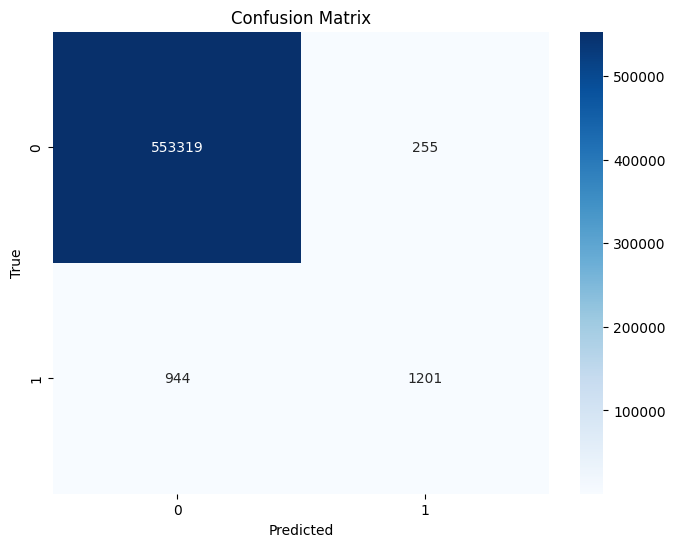

In [152]:
trainerRF.confMatrix()

In [153]:
# most significant variables

print(f"Variable Importance: Logistic Regression")
coeffs = pd.Series(modelLogistic.coef_[0], index=df_train.drop(columns=['is_fraud']).columns)
print(coeffs.sort_values(ascending=False))
print(f"\n====================================\n")
print(f"Variable Importance: Random Forest")
feature_importance = pd.Series(modelRF.feature_importances_, index=df_train.drop(columns=['is_fraud']).columns)
print(feature_importance.sort_values(ascending=False))

Variable Importance: Logistic Regression
amt               0.468172
grocery_pos       0.459756
shopping_net      0.344161
misc_net          0.294019
gas_transport     0.187353
shopping_pos      0.137644
M                 0.069840
merch_long        0.069739
merch_lat         0.050510
grocery_net       0.049361
personal_care     0.029154
misc_pos          0.017418
merch_distance    0.014708
home              0.005635
entertainment     0.001842
F                -0.069840
health_fitness   -0.101963
city_pop         -0.122125
kids_pets        -0.148495
food_dining      -0.193278
travel           -1.664835
dtype: float64


Variable Importance: Random Forest
amt               0.509059
merch_long        0.093374
merch_lat         0.089256
merch_distance    0.086433
city_pop          0.079015
grocery_pos       0.056890
gas_transport     0.022316
shopping_net      0.009874
misc_pos          0.008665
F                 0.007040
M                 0.006300
misc_net          0.006230
shopping_pos    

In [115]:
# important variables

importantCols = ['is_fraud', 'grocery_pos', 'amt', 'shopping_net', 'misc_net', 'merch_lat', 'merch_long', 'merch_distance']

# Model Building: UnSupervised Learning Model

In [116]:
df_train_unsup = df_train[importantCols]
df_test_unsup = df_test[importantCols]

In [117]:
def plot2dSubplot(df_train_unsup, columns):
    combinations = list(itertools.combinations(columns, 2))[:12]  # 12 pairs for a 4x3 grid

    fig = plt.figure(figsize=(20, 15))
    for i, (col1, col2) in enumerate(combinations, 1):
        ax = fig.add_subplot(4, 3, i)
        ax.scatter(df_train_unsup[col1], df_train_unsup[col2], c=df_train_unsup['cluster'], cmap='plasma', edgecolor='k')
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.set_title(f"{col1} vs {col2}")

    plt.tight_layout()
    plt.show()

In [118]:
pca = PCA(n_components=3) # PCA with 1 principal component
Xtrain_pca = pca.fit_transform(df_train.drop(columns=['is_fraud']))
Xtest_pca = pca.fit_transform(df_test.drop(columns=['is_fraud']))

In [119]:
kmeansTrain = KMeans(n_clusters=2)
kmeansTrain.fit(Xtrain_pca)
clustersTrain = kmeansTrain.labels_
df_train_unsup['cluster'] = clustersTrain

f1 = f1_score(df_train_unsup['is_fraud'], df_train_unsup['cluster'])
cm = confusion_matrix(df_train_unsup['is_fraud'], df_train_unsup['cluster'])

print('Result: \n')
print("F1 Score:", f1)
print(f"{cm}\n")

Result: 

F1 Score: 0.010548110013709745
[[58563 70332]
 [  396   377]]



<ipython-input-119-44dddbb6c3d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_unsup['cluster'] = clustersTrain


In [120]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1)
anomaliestrain = iso_forest.fit_predict(Xtrain_pca)
anomaliestest = iso_forest.fit_predict(Xtest_pca)
df_train_unsup['cluster'] = (anomaliestrain == -1).astype(int)
df_test_unsup['cluster'] = (anomaliestest == -1).astype(int)

f1 = f1_score(df_train_unsup['is_fraud'], df_train_unsup['cluster'])
cm = confusion_matrix(df_train_unsup['is_fraud'], df_train_unsup['cluster'])


print('\n Result (Training set): \n')
print("F1 Score:", f1)
print(f"{cm}\n")

f1 = f1_score(df_test_unsup['is_fraud'], df_test_unsup['cluster'])
cm = confusion_matrix(df_test_unsup['is_fraud'], df_test_unsup['cluster'])

print('Result (Testing set): \n')
print("F1 Score:", f1)
print(f"{cm}\n")

<ipython-input-120-c61cfdee344e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_unsup['cluster'] = (anomaliestrain == -1).astype(int)
<ipython-input-120-c61cfdee344e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_unsup['cluster'] = (anomaliestest == -1).astype(int)



 Result (Training set): 

F1 Score: 0.07846277021617294
[[116468  12427]
 [   234    539]]

Result (Testing set): 

F1 Score: 0.053467782455775596
[[499545  54029]
 [   602   1543]]



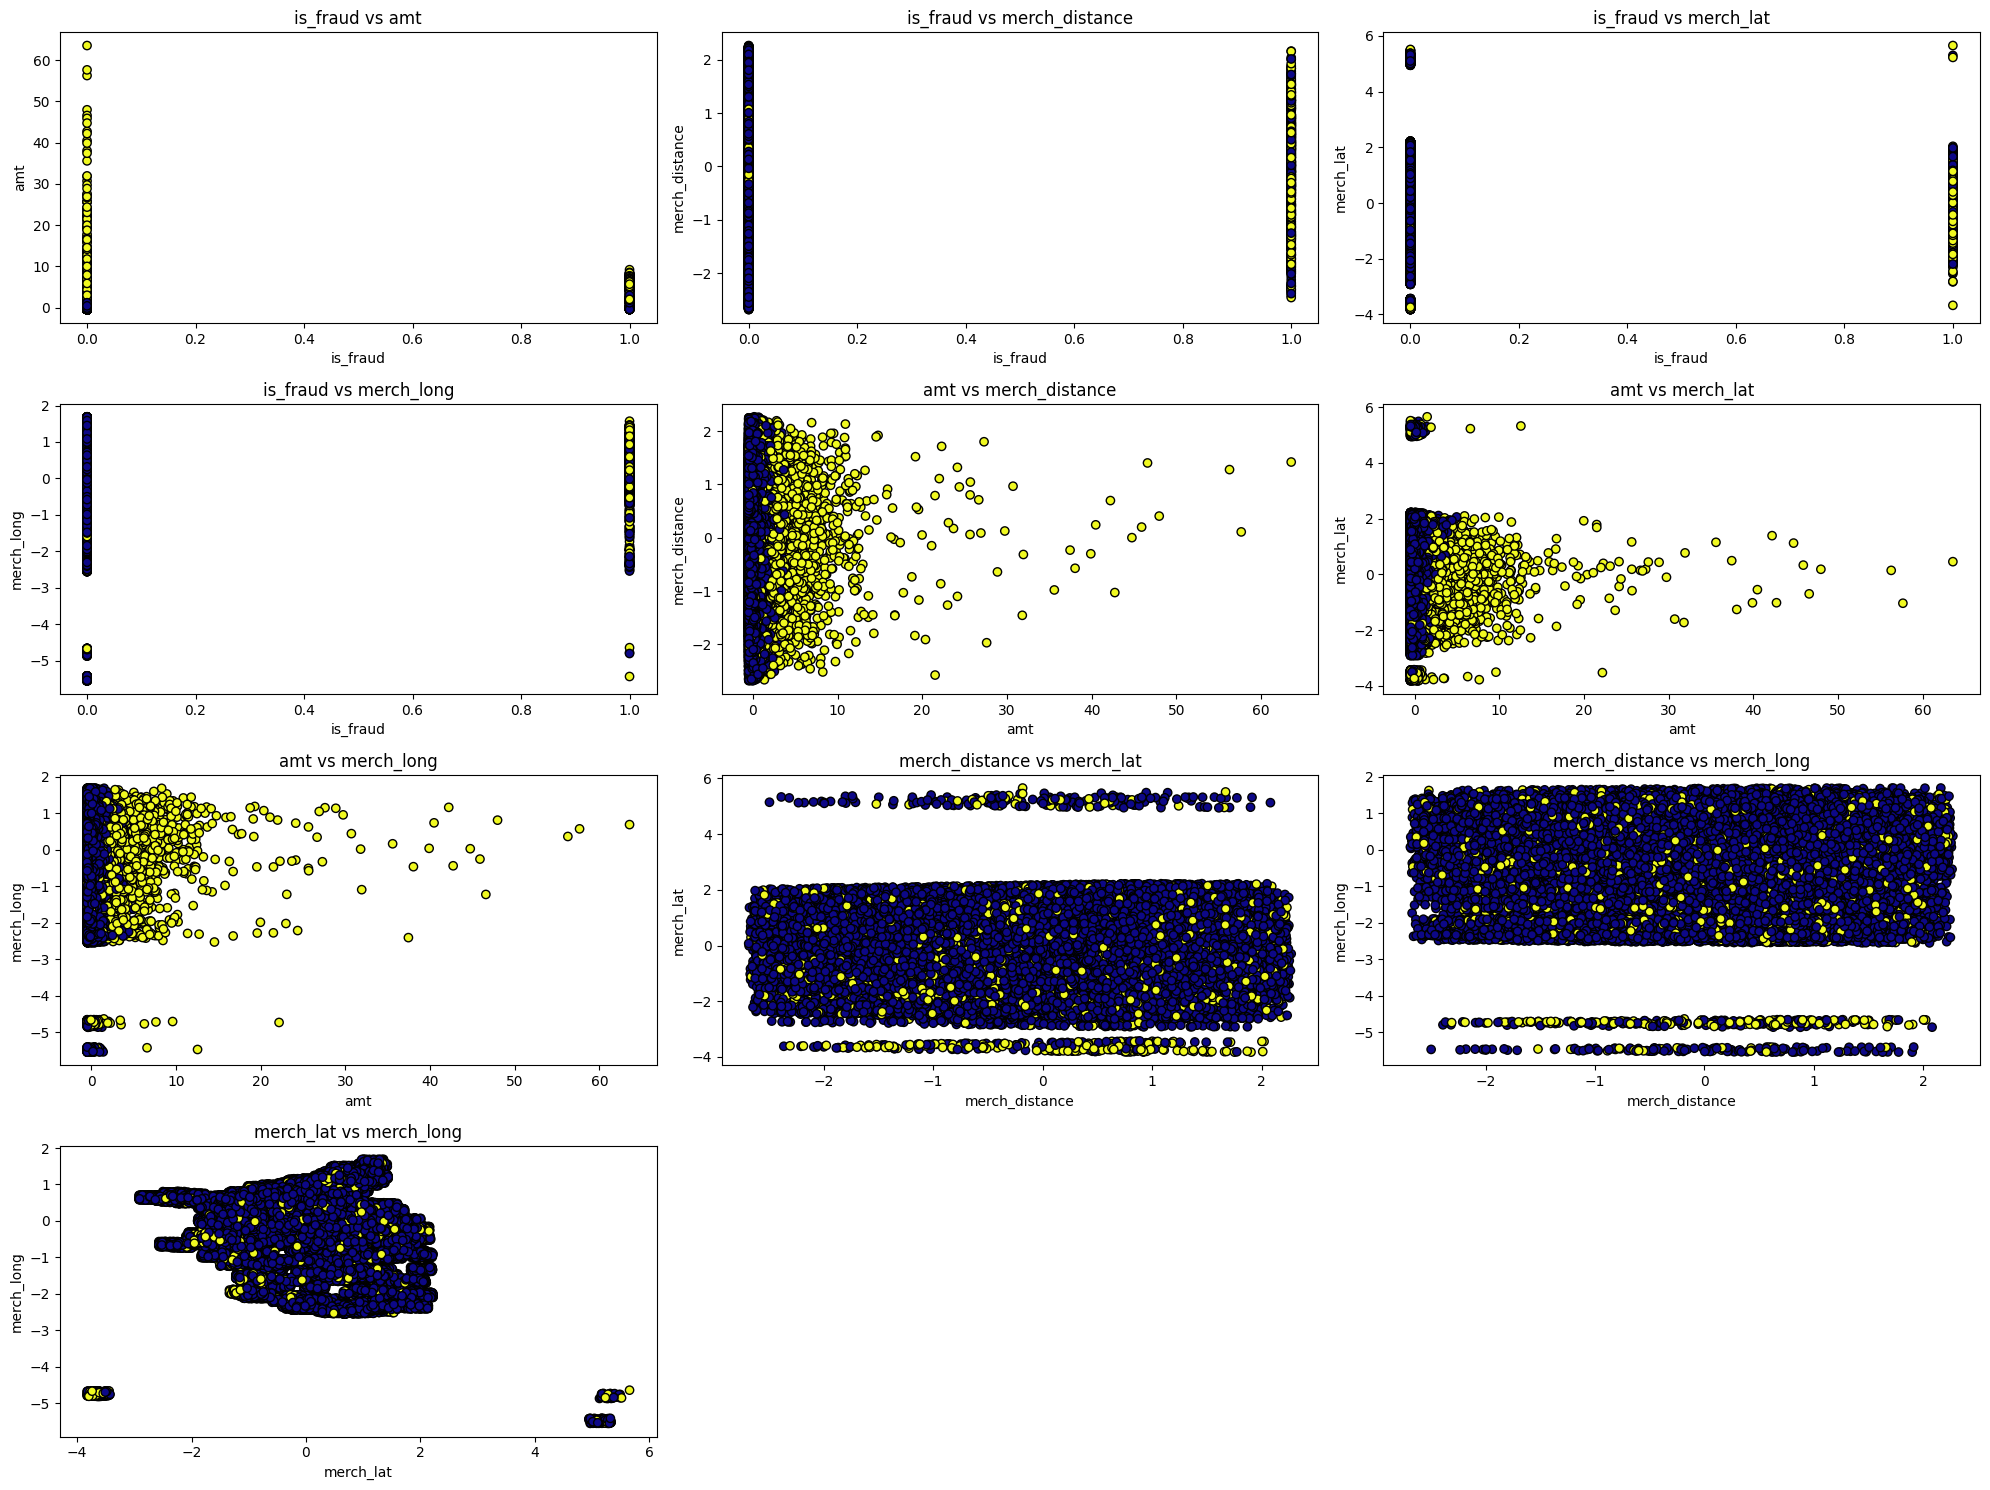

In [121]:
plot2dSubplot(df_train_unsup, ['is_fraud', 'amt',  'merch_distance', 'merch_lat', 'merch_long'])

# References



1.   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
2.   https://stackoverflow.com/questions/35876508/evaluate-multiple-scores-on-sklearn-cross-val-score
3. https://www.geeksforgeeks.org/ml-one-hot-encoding/
4. https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html
5. https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.IsolationForest.html
6. https://datascience.stackexchange.com/questions/985/can-i-use-unsupervised-learning-followed-by-supervised-learning
7. https://chatgpt.com/ for references and suggestions
8. https://scikit-learn.org/dev/modules/generated/sklearn.cluster.AgglomerativeClustering.html
9. https://medium.com/@corymaklin/isolation-forest-799fceacdda4


